# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [4]:
# Libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to supress warnings
import warnings
warnings.filterwarnings("ignore")

# Library to get unique values counts of a column
from collections import Counter

### Understanding the structure of the data

In [6]:
# read the data
data = pd.read_csv('foodhub_order.csv')
# df = pd.read_csv('/location on your computer or drive /foodhub_order.csv')
data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [7]:
# creating a copy version to make sure none of the changes applied to copied version doesn't affect original version
df = data.copy()

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [8]:
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


**Observations:**
* Foodhub data has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* Data contains 3 categorical columns and 6 numerical columns (trating Rating as numerical)
* Rating columns has oders whiuch were not rated and filled with default values of Not given
* Order ID and Column ID are unique values of orders placed by a customer
* There are typos in restaturant name ex: Joe's Shanghai _Àü£¾÷, Big Wong Restaurant \x8c_¤¾Ñ¼
    * No records of actual names found, so not a big issue for analysis
* Duplicate Restaruant name: Dirty Bird To Go (archived) and Dirty Bird To Go (may be the location was changed or owner changed)
* Sarabeth's Restaurant, Sarabeth's, Sarabeth's East, Sarabeth's West might belong to same chain of restaruants
    * Since no information is provided about the differences of owners, these will treated as unique values for the analysis

### Descriptive Statistics

In [11]:
# Printing the shape of the dataframe
print(f"""The dataframe has {df.shape[0]} rows and {df.shape[1]} columns""")

The dataframe has 1898 rows and 9 columns


**Observations**
* The Foodhub dataset contains 1898 rows and 9 columns


In [13]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations**
* None of the columns has missing values
* Rating column values are treated as strings because of default Not given values
    * For the analysis, removing the ratings with Not given when needed and will change the data type to integers
* Apart from ratings columns, all the numerical and categorical have proper data types


In [15]:
# To count the missing values from each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations:**
* None of the columns in the Foodhub dataset contains missing values


In [17]:
# To get the descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [18]:
# min, max, and average time to prepare the food

min_time = df['food_preparation_time'].min()
max_time = df['food_preparation_time'].max()
mean_time = round(df['food_preparation_time'].mean(), 2)

print(f"Minimum time to prepare the food once order is placed: {min_time}")
print(f"Maximum time to prepare the food once order is placed: {max_time}")
print(f"Maximum time to prepare the food once order is placed: {mean_time}")

Minimum time to prepare the food once order is placed: 20
Maximum time to prepare the food once order is placed: 35
Maximum time to prepare the food once order is placed: 27.37


In [19]:
# Descriptive statistics for order_id and Customer_id is not meaninful in this data
df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


In [20]:
categorical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week']
for i in categorical_columns:
    print(f"Top 5 unique values and their occurances of {i}")
    print(df[i].value_counts()[0:5])
    print()

Top 5 unique values and their occurances of restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

Top 5 unique values and their occurances of cuisine_type
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64

Top 5 unique values and their occurances of day_of_the_week
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64



**Observations:**
* **Cost of orders is right skewed** as the data has outliers with values around **35 and mean of 16.5 dollors**
* Food Preparation time and delivery time are closely normally distributed
    * Minimum, maximum and mean food preparation times are: 20, 35, and 27 dollors
    * Minimum, maximum and mean delivery times are: 15, 33, and 24 dollors
* American cuisine types has most number of orders received


In [186]:
# To extract rating column which are not rated
print(df['rating'].value_counts())

# To extract rating column which are not rated in percentages
df['rating'].value_counts(normalize = True)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

**Observations:**
* In the given dataset orders which were not rated are 736 (~39%)


### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Order Id

In [27]:
# Getting unique values of order Id
print(f"Number of unique order are : {df['order_id'].nunique()}")


Number of unique order are : 1898


**Observations:**
* In the dataset description, it is stated that the order ID is unique. We have observed the same by examining the count of unique order ID values.
* No duplicates found

#### Customer Id

In [30]:
# to get unique customers
print(f"Number of unique customers are : {df['customer_id'].nunique()}")

# printing empty line for better visibility
print()

print("Top 5 customers by total number of orders palced are shown below")
# To get Customer with highest no of orders
df['customer_id'].value_counts()[0:5]

Number of unique customers are : 1200

Top 5 customers by total number of orders palced are shown below


52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

**Observations:**
* FoodHub dataset contains information about 1200 unique customers
* Among all the customers, Customer ID: 52832 placed a total of 13 orders from different cuisines
* Customer ID: 47440 placed a total of 10 only from American cuisine style and mostly from same restaruant

#### Restaurant Name

In [33]:
# to get unique restaurants
print(f"Number of unique restaurants are : {df['restaurant_name'].nunique()}")

# printing empty line for better visibility
print()

# To get Customer with highest no of orders
print("Top 5 restaurants with highest order received are shown below")
print(df['restaurant_name'].value_counts()[0:5])

print()

# To get Customer with lowest no of orders
print("Top 5 restaurants with highest order received are shown below")
print(df['restaurant_name'].value_counts()[-5:])

Number of unique restaurants are : 178

Top 5 restaurants with highest order received are shown below
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

Top 5 restaurants with highest order received are shown below
Sushi Choshi        1
Dos Caminos Soho    1
La Follia           1
Philippe Chow       1
'wichcraft          1
Name: restaurant_name, dtype: int64


**Observations:**
* FoodHub dataset contains information about 178 unique restaurants
* Among all the restaurants, Shake Shack received highest number of orders: 219(12%) of total orders
* Among all the restaurants, wichcraft received lowest number of orders: only 1 order

#### Cuisine Type

In [36]:
# to get unique restaurants
print(f"Number of unique cuisine types are : {df['cuisine_type'].nunique()}")

print()

# To get Customer with highest no of orders
print("Top 5 restaurants with highest order received are shown below")
print(df['cuisine_type'].value_counts()[0:5])

print()

# To get Customer with highest no of orders
print("Bottom 5 restaurants with lowest order received are shown below")
print(df['cuisine_type'].value_counts()[-5:])

Number of unique cuisine types are : 14

Top 5 restaurants with highest order received are shown below
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64

Bottom 5 restaurants with lowest order received are shown below
French        18
Southern      17
Korean        13
Spanish       12
Vietnamese     7
Name: cuisine_type, dtype: int64


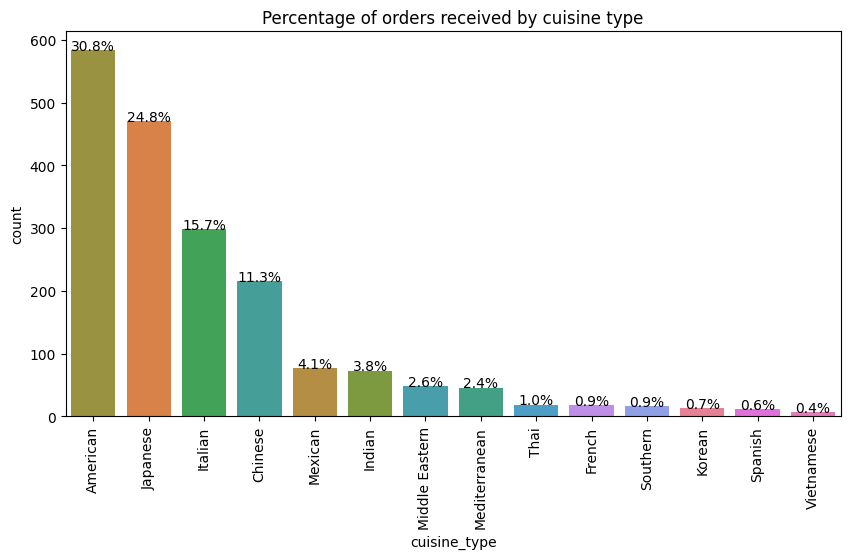

In [159]:
# Count the occurances of each category
counts = Counter(df['cuisine_type'])

# Sorting the cuisine type by number of order received
sorted_cuisines = sorted(counts, key=counts.get, reverse=True)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type', order=sorted_cuisines, hue = 'cuisine_type')
total = len(df)
for i, cat in enumerate(sorted_cuisines):
    count = counts[cat]
    percentage = (count / total) * 100
    plt.text(i, count + 0.1, f'{percentage:.1f}%', ha='center')

plt.title("Percentage of orders received by cuisine type")
plt.xticks(rotation=90);

**Observations:**
* FoodHub dataset contains information about 14 different cuisine types
* Among all the cuisine types, American cusine type received highest number of orders: 584(31%) of total orders
* Among all the cuisine types, Vietnamese cusine type received lowest number of orders: 7(0.4%) of total orders

#### Cost of the order

In [40]:
# function to plot histogram and box plot together

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, meanline = True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--', label='Mean') # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-', label='Median') # Add median to the histogram

    plt.show()

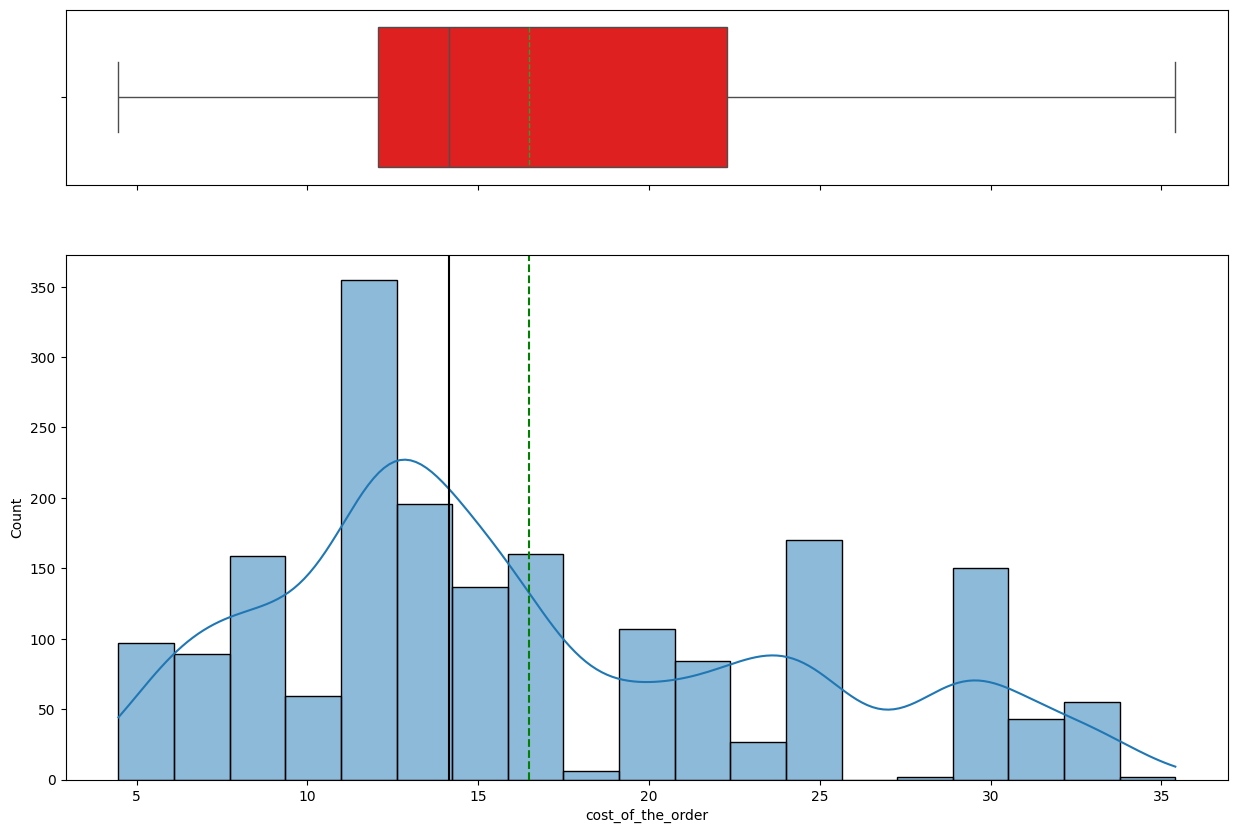

In [41]:
histogram_boxplot(df['cost_of_the_order']) # plots histogram and box plot of cost of orders

**Observations:**
* The distribution of cost of orders is not normal or skewed in a particular direction
* This distribution has multiple peaks indicating a multimodal distribution
* Lowest cost order is 5 while the maximum cost of order is 35 dollors
* The mean and median of cost of the order are 16.5 and ~14 dollors
* Mode of cost of order is ~$12, but these orders are from different restaurants and different cuisine types indicating there is no popular food
* There are no extreme (outliers) cost of orders in the data

#### Day of the week

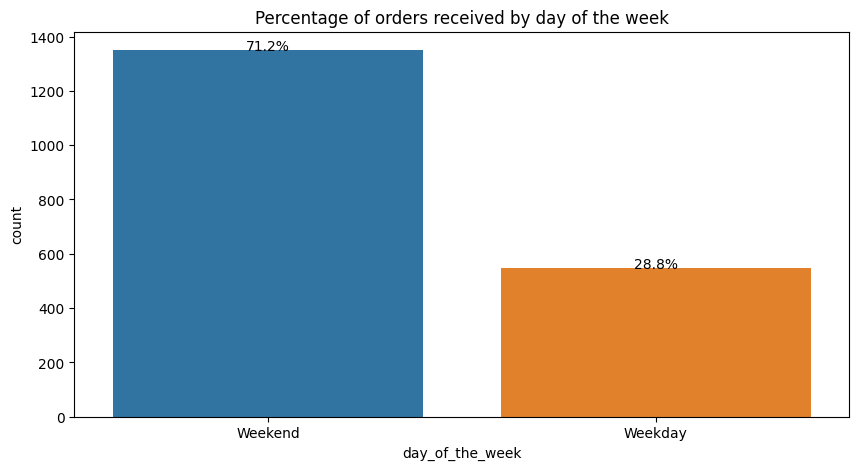

In [161]:
# Count the occurances of day of the week

req_data = df['day_of_the_week']
counts = Counter(req_data)

# Sorting the day of the week by number of order received
sorted_weeks = sorted(counts, key=counts.get, reverse=True)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_the_week', order=sorted_weeks, hue = 'day_of_the_week')
total = len(df)
for i, cat in enumerate(sorted_weeks):
    count = counts[cat]
    percentage = (count / total) * 100
    plt.text(i, count + 0.1, f'{percentage:.1f}%', ha='center')

plt.title("Percentage of orders received by day of the week");

**Observations:**
* The percentage orders received on Weekend(71%) is greater than orders received on Weekend(~29%)

#### Rating

Number of unique ratings in the data are: 4


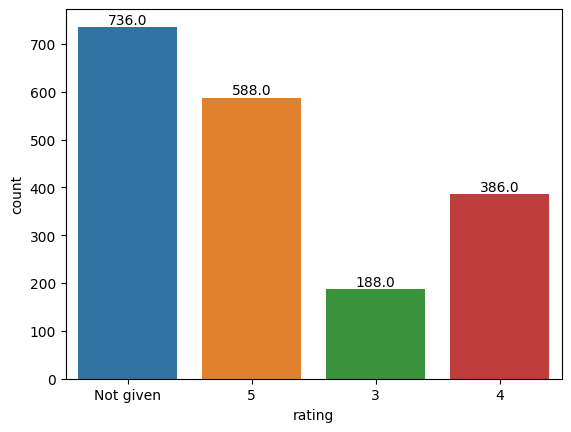

In [192]:
# check unique values and their frequencies
print(f"Number of unique ratings in the data are: {df['rating'].nunique()}")

# bar plot to count the occurances of each unique rating
ax = sns.countplot(x='rating', data=df, hue = 'rating')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [48]:
# Orders without ratings were removed to take closer look at the data

# subset the data witout Not given rating
rate_df = df[df['rating'] != 'Not given'].reset_index(drop=True)

# get the data type of rating column
print("Data-type of Rating column before change:", rate_df['rating'].dtypes)

# change datatype of rating column
rate_df['rating'] = rate_df['rating'].astype(float)

# check datatype after changing the data type of rating  columns
print("Data-type of Rating column after the change:", rate_df['rating'].dtypes)

rate_df.head(5)

Data-type of Rating column before change: object
Data-type of Rating column after the change: float64


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
1,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
2,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
3,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
4,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30


**Observations:**
* ~39% orders received no ratings from the customers
* Among the orders received rating 50% of the customers rated 5 for their food
* For all the orders received rating the mean is 4.34 rating and median is 5
* The distribution is left skewed, the mean is pulled in the direction of tail, making it smaller than median for the orders received rating

#### Food Preparation Time

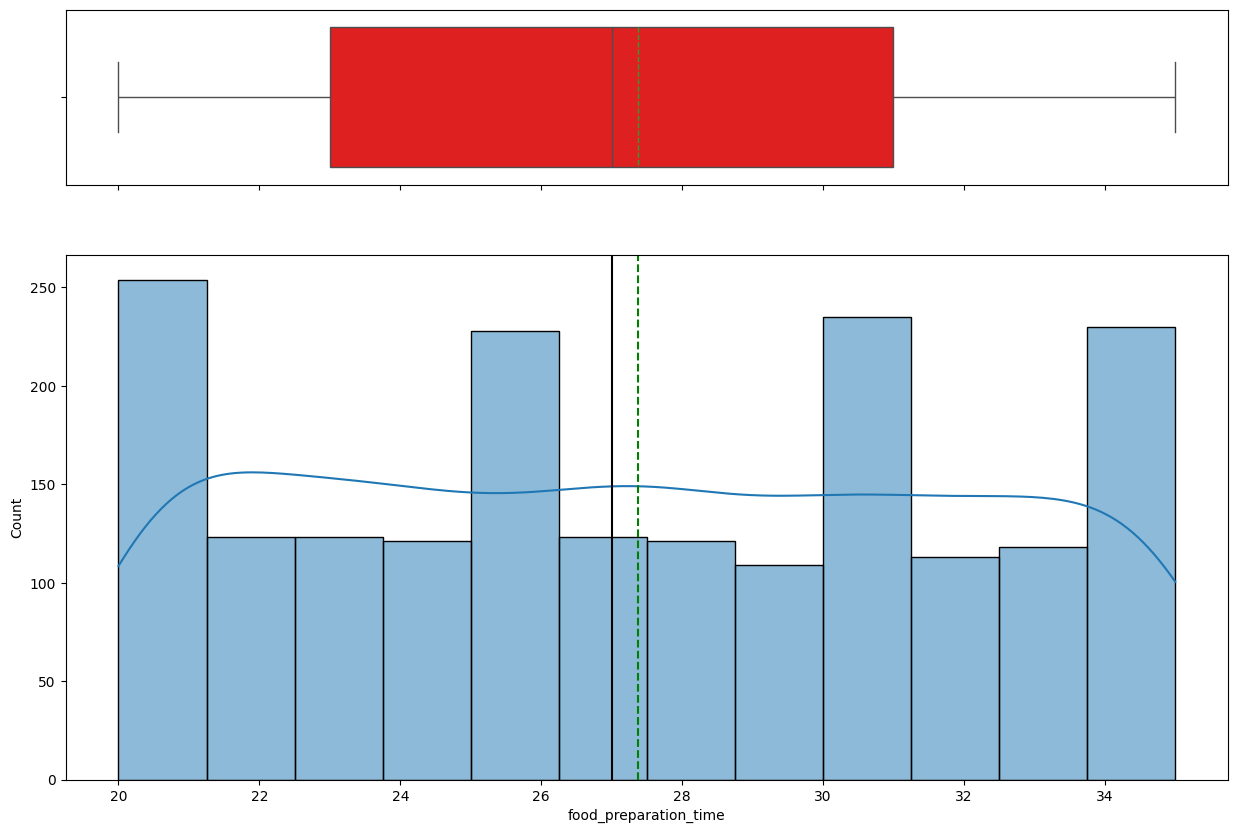

In [51]:
histogram_boxplot(df['food_preparation_time']) # plots histogram and box plot of food preparation time

**Observations:**
* Food preparating is neither normal distributed nor a skew distribution, it following close to uniform distribution
* Mean food preparing time is ~27.4 minutes and median food preparation time is 27 minutes
* Multiple peaks are clealy seen at around 20 minutes, 26 minutes, 30 and 34 minutes
* These peaks might be related to particular cuisine types

#### Delivery Time

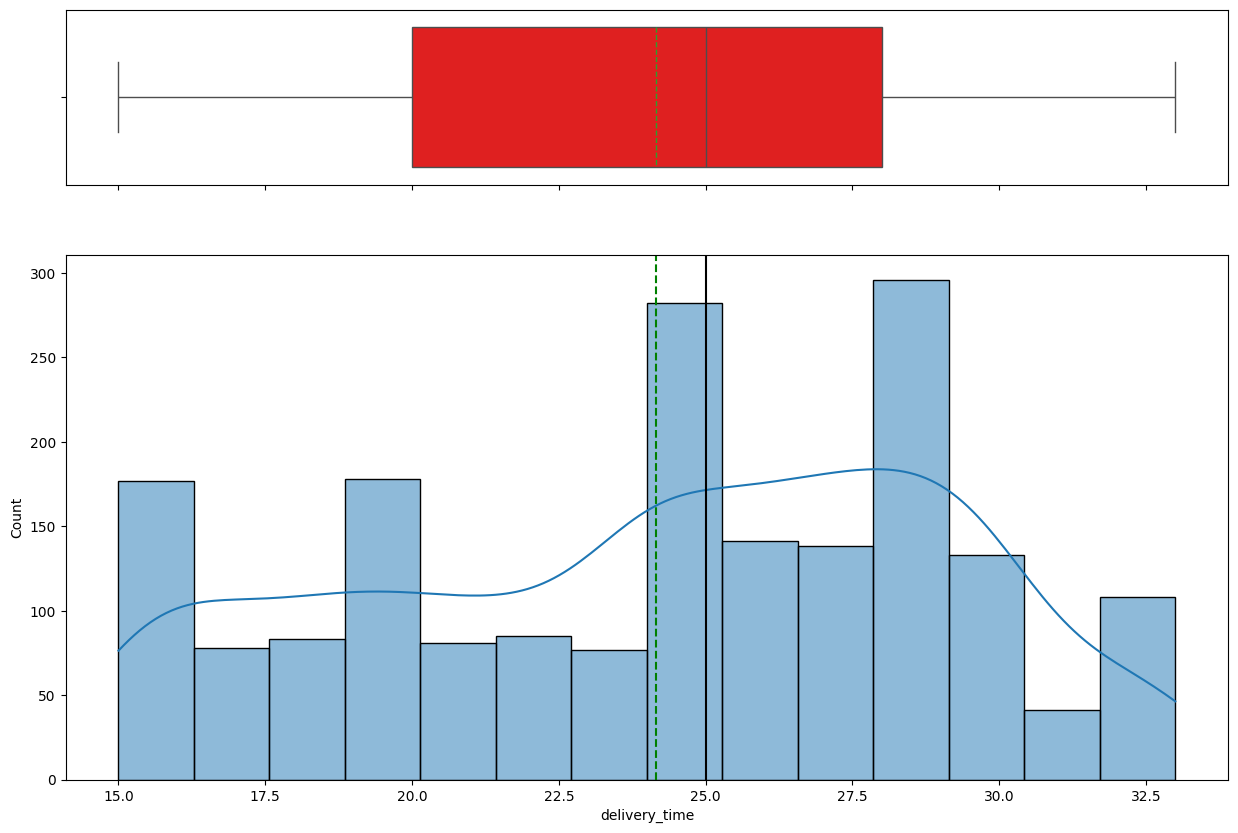

In [54]:
histogram_boxplot(df['delivery_time']) # plots histogram and box plot of delivery_time

**Observations:**
* Mean food delivery time is ~24 minutes, while the median is 25 minutes
* The distribution is following closely the distribution of food preparation time

#### Top 5 restaurants in terms of the number of orders received?

In [57]:
# To get top 5 restaruants with highest no.of orders
df['restaurant_name'].value_counts()[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Observations:**
* Highest number of orders received are from Shake Shack with 219(11.5%) orders in total
* 138 restarunats received less than 10 orders in total

#### Which is the most popular cuisine on weekends?

In [60]:
# To get most popular cuisine on weekends

df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

**Observations:**
* Most popular cuisine type is American with 415(~31%) total number of orders 


#### What percentage of the orders cost more than 20 dollars?

In [63]:
# Get percentage of orders which are more than 20 dollors

print(f"""Percentage of orders which costed more than 20 dollors: {round(len(df[df['cost_of_the_order'] > 20])/len(df) * 100, 2)}%""")

Percentage of orders which costed more than 20 dollors: 29.24%


#### What is the mean order delivery time?

In [65]:
# Get mean of order delivery time
print(f"""Mean delivery time of orders is {round(df['delivery_time'].mean(), 2)}""")

Mean delivery time of orders is 24.16


#### If the company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed?

In [67]:
# To find the top 3 customers who are eligible for 20% discount vouchers
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

**Observations:**
* Customers with Ids: 52832, 47440, 83287 are eligible for 20% discount vouchers


### Multivariate Analysis

#### Day of the week vs food preparation time

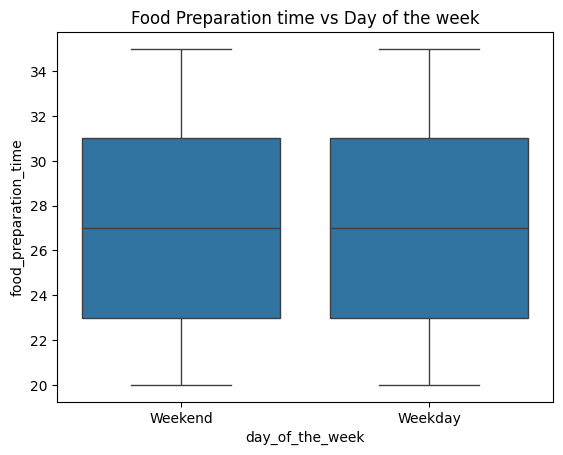

In [71]:
# box plot of food preparation time by day of the week
plt.title("Food Preparation time vs Day of the week")
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time');

In [72]:
# Percentage of orders received by day of the week
df['day_of_the_week'].value_counts(normalize = True)

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

**Observations:**
* Even though weekend orders are 71% of total orders, the overall food preparation time follows same distribution between weekdays and weekends

#### Cuisine Type vs food preparation time

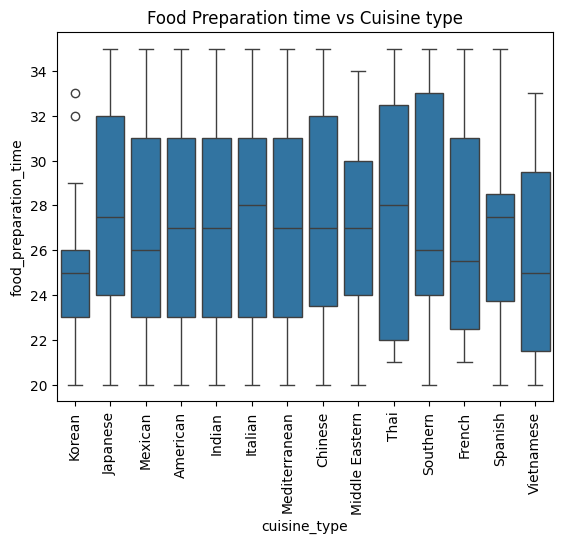

In [196]:
# box plot of food preparation time by cuisine type
plt.title("Food Preparation time vs Cuisine type")
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);

In [76]:
# Percentage of orders received by cuisine type
df['cuisine_type'].value_counts(normalize = True)

American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: cuisine_type, dtype: float64

**Observations:**
* Though the median food preparation time of Korean cuisine type is less than other cuisine types, we cannot conclude korean dishes are easier to prepare
* Korean orders are only 0.7% of total orders and they have outliers more than 30 minutes
* Vietnamese cuisine type consists of only 0.4% of total orders but the variability is really high among the food preparation time
* Among all the cuisine types, Thai cuisine type has larger median value indicating highest minutes of preparation time

#### Day of the week vs Delivery time

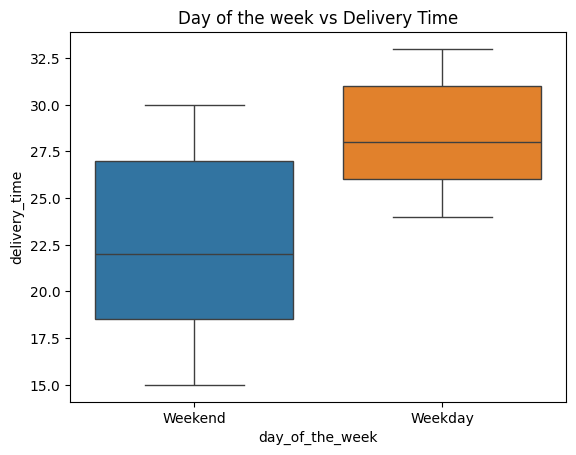

In [200]:
# box plot of  day of the week vs Delivery time
plt.title("Day of the week vs Delivery Time")
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue = 'day_of_the_week');

**Observations:**
* The median delivery time on weekday is ~33% higher than weekend even though the number of orders received on weekdays are less
* This could be due to limited availibility of delivery drivers during weekdays

#### Cuisine type vs cost of the order

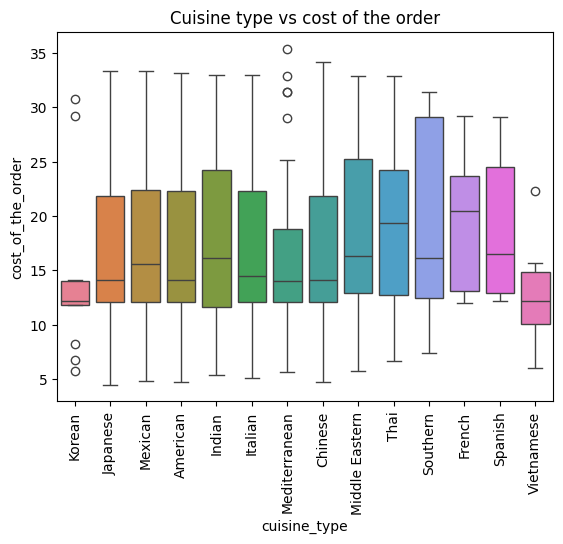

In [198]:
plt.title("Cuisine type vs cost of the order")
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue = 'cuisine_type')
plt.xticks(rotation=90);

**Observations:**
* Korean cuisine type has one of lowest number of orders in this data, but has many outliers
* Vietnamese cuisine has low median cost among all the other cuisine types but the data is too small for this cuisine type to conclude.

#### Cuisine Type vs Day of the week

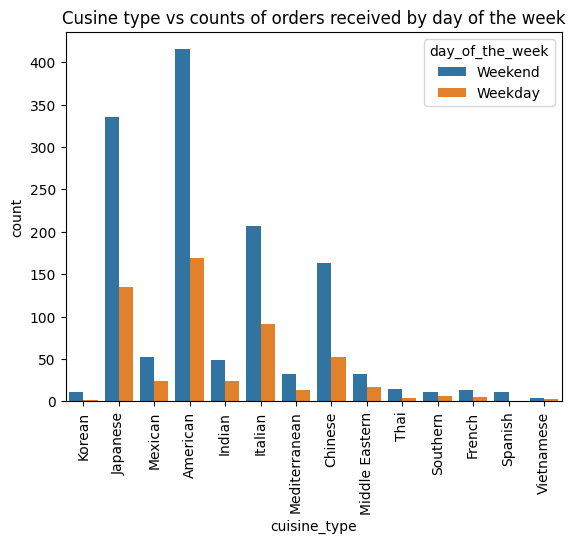

In [85]:
plt.title("Cusine type vs counts of orders received by day of the week")
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

**Observations:**
* Whether it's a weekday or weekend American cuisine type received most of the orders

#### Rating vs Food Preparation time, delivery time and cost of the order

**Objectives:**
* Foodhub dataset containes ~39% of the orders without any rating
* Performing EDA analysis by removing the rows without ratings

In [89]:
# to remove rows with Not given rating
ratings_df = df[df['rating'] != 'Not given'].reset_index(drop=True)
ratings_df['rating'] = ratings_df['rating'].astype('int')
ratings_df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
1,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
2,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
3,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
4,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


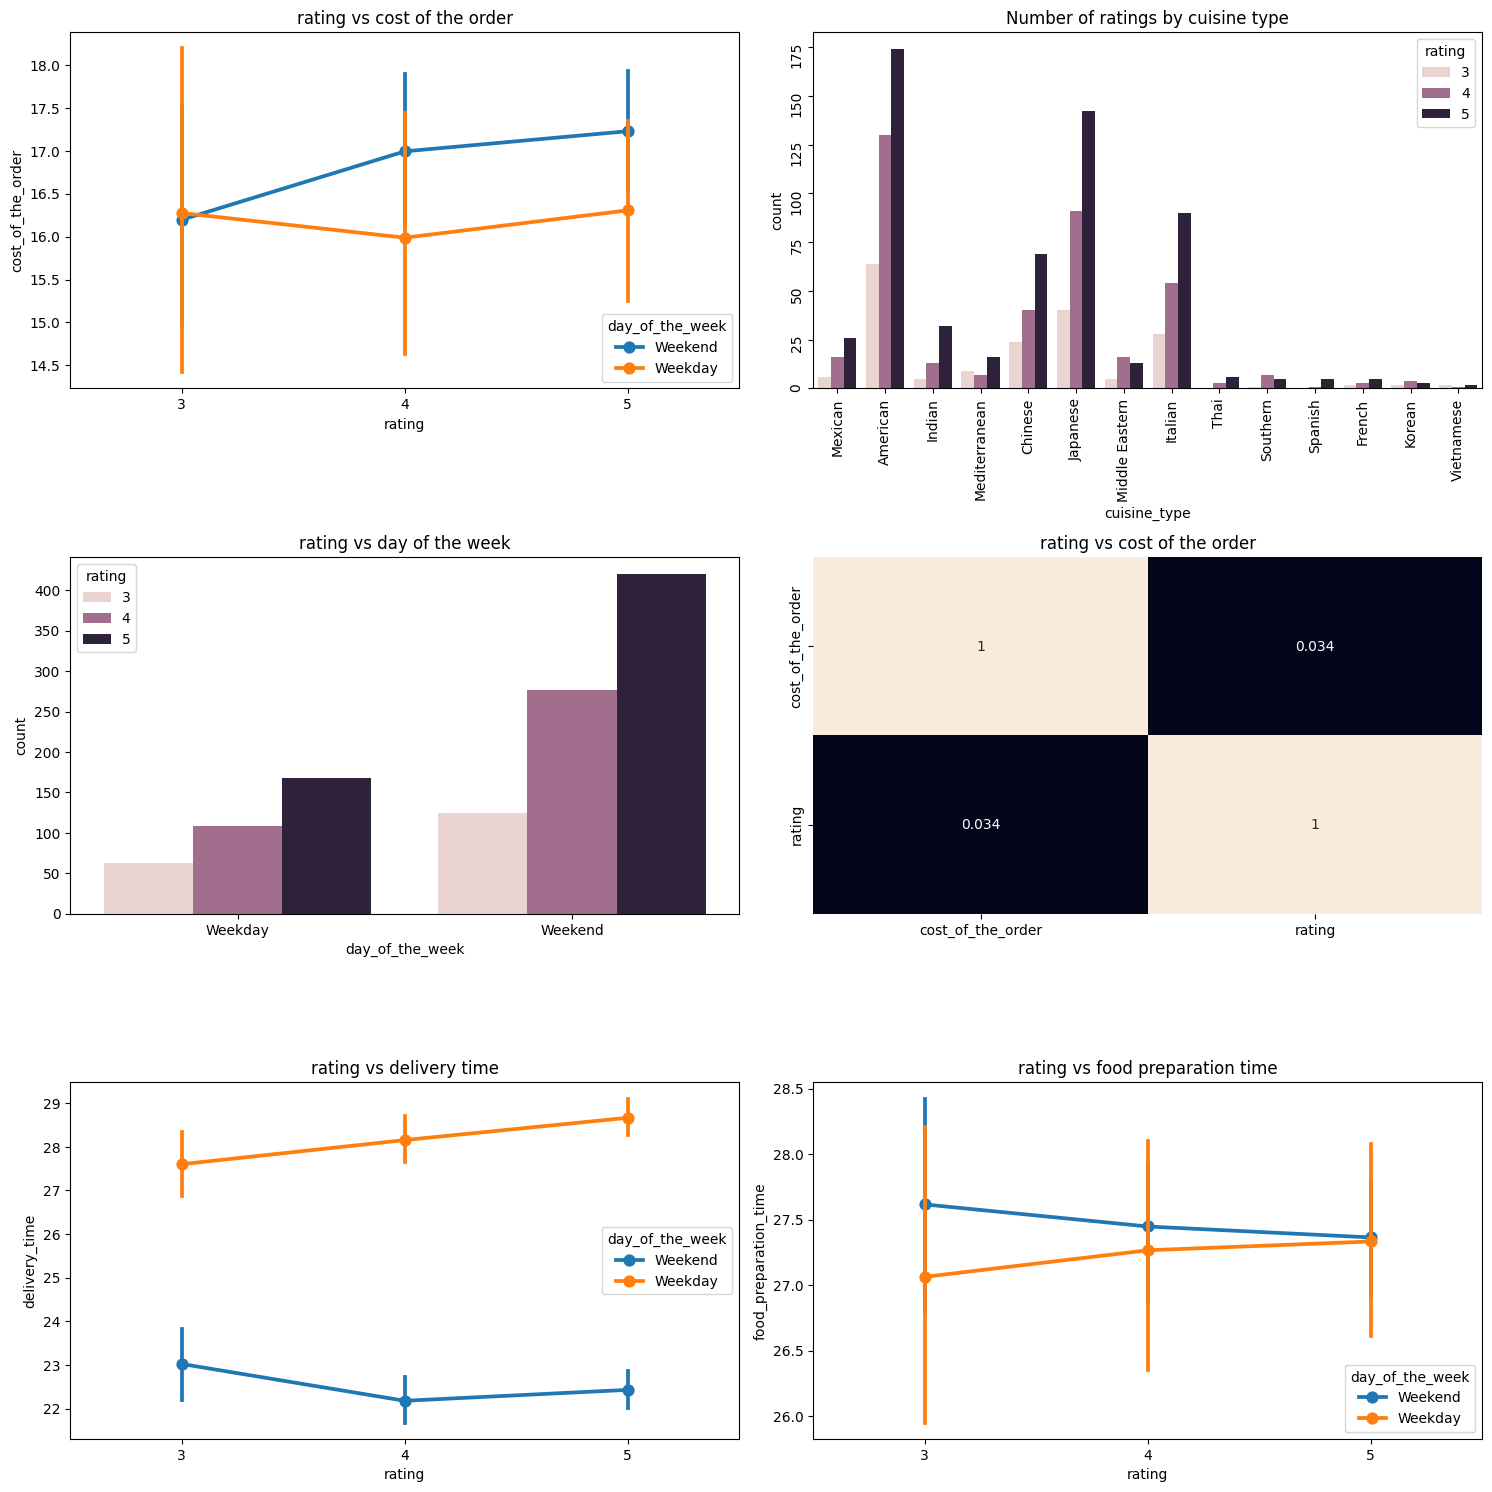

In [90]:
# to create subplots
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

# subplot of ratings vs cost of the order by day of the week
sns.pointplot(ax=axes[0, 0], data=ratings_df, x='rating', y='cost_of_the_order', hue = 'day_of_the_week')
axes[0, 0].set_title('rating vs cost of the order') # 1st subplot title

# subplot of ratings vs cuisine type
sns.countplot(ax=axes[0, 1], data=ratings_df, x='cuisine_type', hue='rating')
axes[0, 1].tick_params(labelrotation=90) # rotating the labels
axes[0, 1].set_title('Number of ratings by cuisine type') # 2nd subplot title

# subplot of day of the week vs count of rating
sns.countplot(ax=axes[1, 0], data=ratings_df, x='day_of_the_week', hue='rating')
axes[1, 0].set_title('rating vs day of the week') # 3rd subplot title

# subplot of ratings vs cost of the order by day of the week
sns.heatmap(ax=axes[1, 1], data=ratings_df[['cost_of_the_order', 'rating']].corr(), annot=True, cbar=False);
axes[1, 1].set_title('rating vs cost of the order') # 4th subplot title

# subplot of ratings vs delivery time by day of the week
sns.pointplot(ax=axes[2, 0], data=ratings_df, x='rating', y='delivery_time', hue = 'day_of_the_week');
axes[2, 0].set_title('rating vs delivery time') # 5th subplot title

# subplot of ratings vs food preparation time by day of the week
sns.pointplot(data=ratings_df, x='rating', y='food_preparation_time', hue = 'day_of_the_week');
axes[2, 1].set_title('rating vs food preparation time') # 6th subplot title

fig.tight_layout(pad=1.0);

**Observations:**
* Mean ratings of the orders are high during weekends than weekdays
*  Orders with rating 3 were priced around 16 dollors on weekdays, which are around same values with orders receiving 4 and 5 star ratings
* Orders with rating 3 were priced around 16 dollors on weekends, which are lesser than the orders receiving 4 and 5 star ratings
* Following observation are made while investigating the orders with low cost on average received low ratings
    * Food preparation time has little impact on ratings especially during weekends 
        * Customers might be tracking the preparation time on ios or android apps
    * Ratings are uneffected by delivery time
        * Delivery time is significantly less on weekends and varying around smae average time
        * So rating are uneffected by delievry time
    * Ratings are uneffected by prices across various cusine types
    * No sign of lesser no of orders received on either weekdays or weekends than the orders with higher ratings
    * Rating are uneffected by cost of the orders
        * No strong correlation between cost of orders and ratings (0.034)

#### Heatmap of numerical variables

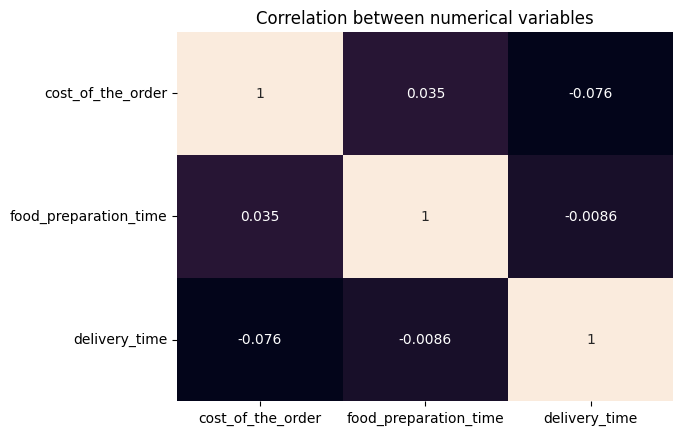

In [93]:
plt.title("Correlation between numerical variables")
sns.heatmap(data=ratings_df[['cost_of_the_order', 'food_preparation_time','delivery_time']].corr(), annot=True, cbar=False);

**observations:**
* All the numerical variables are weakly correlated
* No strong trends found between these numerical variables

In [95]:
# subset the data witout Not given rating
rate_df = df[df['rating'] != 'Not given']

# get the data type of rating column
print("Data-type of Rating column before change:", rate_df['rating'].dtypes)

# change datatype of rating column
rate_df['rating'] = rate_df['rating'].astype(float)

# check datatype after changing the data type of rating  columns
print("Data-type of Rating column after the change:", rate_df['rating'].dtypes)

rate_df

Data-type of Rating column before change: object
Data-type of Rating column after the change: float64


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3.0,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19


In [96]:
# function to get count of rating and mean of rating for restaurant_name or cuisine_type or day_of_the_week
def f(x):
    d = {}
    d['count_of_ratings'] = x['rating'].count()
    d['mean_of_ratings'] = x['rating'].mean()
    return pd.Series(d, index=['count_of_ratings', 'mean_of_ratings'])

# to get the mean and count of ratings for restaurant_name column
mean_count_rate_df = rate_df.groupby(['restaurant_name']).apply(f).reset_index().sort_values(by = 'count_of_ratings', ascending = False)
mean_count_rate_df

,restaurant_name,count_of_ratings,mean_of_ratings
117,Shake Shack,133.0,4.278195
132,The Meatball Shop,84.0,4.511905
17,Blue Ribbon Sushi,73.0,4.219178
16,Blue Ribbon Fried Chicken,64.0,4.328125
104,RedFarm Broadway,41.0,4.243902
...,...,...,...
51,Frank Restaurant,1.0,4.000000
118,Socarrat Paella Bar,1.0,5.000000
47,El Parador Cafe,1.0,5.000000
79,Lucky Strike,1.0,4.000000


In [97]:
# to get restaruants with atleat 50 rating with a mean of at least of 4 ratings
mean_count_rate_df[(mean_count_rate_df['count_of_ratings'] > 50) & (mean_count_rate_df['mean_of_ratings']> 4)]

,restaurant_name,count_of_ratings,mean_of_ratings
117,Shake Shack,133.0,4.278195
132,The Meatball Shop,84.0,4.511905
17,Blue Ribbon Sushi,73.0,4.219178
16,Blue Ribbon Fried Chicken,64.0,4.328125


**Observations:**
* Restaurants Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken are eligible for promotional offers


### Exploring data

#### If The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [101]:
# Calculate total revenue generated by the company

total_revenue = 0

for i in df['cost_of_the_order']:

    # cost of orders more than $20
    if i > 20:

        total_revenue = total_revenue + i * 0.25

    # cost of orders more than $5
    elif i > 5:

        total_revenue = total_revenue + i * 0.15

    # cost of orders less than $5
    else:

        pass

total_revenue = round(total_revenue, 2)
print(f"Total revenue received by the company is ${total_revenue} only")

Total revenue received by the company is $6166.3 only


#### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.

In [103]:
# Total time to deliver food to customer from the time of order is placed is equal to time taken for food_preparation_time and delivery_time

# adding a column to calculate the total time taken to deliver the food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


In [104]:
print(f"""Percentage of orders which took more 60 minutes to get delivered from the time the order is placed: {round(len(df[df['total_time'] > 60])/len(df) * 100, 2)}%""")

Percentage of orders which took more 60 minutes to get delivered from the time the order is placed: 10.54%


#### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [106]:
# Mean delivery time by day of the week
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:


### Conclusion and Recommendations

### Conclusions:
* There's more business happening on weekends(71% orders) compared against weekdays(29% orders)
* Most of the orders are coming from American cuisine type especially from fast food chain restaurants
    * This is may be due to combo offers these particular restaurants offered
    * Very less impact of food prepartion time, delivery time and cost of the orders on the ratings given
* Not a lot of repeated customers and most of the customers are rating their food

### Recommendations:

* Include promotional offers for using their Foodhub app
    * More offers to most frequent customers
    * Signup offers to the new users
    * Cashback offers to drive more users to place orders from the FoodHub app
* Gather more feedback and ask for rating to provide feedback to the restaurant owners